In [1]:
import pandas as pd
import geocoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import folium

In [2]:
url = "https://github.com/NYU-DataScience-Project/Africa-Econ-Crisis-Analysis-NYU/blob/main/africa-economic-banking-and-systemic-crisis-data/african_crises.csv?raw=true"
data = pd.read_csv(url)

In [3]:
data.head

<bound method NDFrame.head of       case  cc3   country  year  systemic_crisis    exch_usd  \
0        1  DZA   Algeria  1870                1    0.052264   
1        1  DZA   Algeria  1871                0    0.052798   
2        1  DZA   Algeria  1872                0    0.052274   
3        1  DZA   Algeria  1873                0    0.051680   
4        1  DZA   Algeria  1874                0    0.051308   
...    ...  ...       ...   ...              ...         ...   
1054    70  ZWE  Zimbabwe  2009                1  354.800000   
1055    70  ZWE  Zimbabwe  2010                0  378.200000   
1056    70  ZWE  Zimbabwe  2011                0  361.900000   
1057    70  ZWE  Zimbabwe  2012                0  361.900000   
1058    70  ZWE  Zimbabwe  2013                0  361.900000   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   


In [4]:
data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [20]:
data.shape

(1059, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [22]:
#count of systemic crises across the countries in the dataset
#Central African Republic has the most.
systemic_crisis_count = data.groupby('country').agg({'systemic_crisis':'sum'})
systemic_crisis_count.sort_values('systemic_crisis',ascending=False, inplace=True)
systemic_crisis_count


,systemic_crisis
country,
Central African Republic,19
Zimbabwe,15
Kenya,13
Nigeria,10
Egypt,6
Tunisia,5
Algeria,4
Ivory Coast,4
Zambia,4


In [23]:
#count of currency crises across the countries in the dataset
#Angola has the most.
currency_crises_count = data.groupby('country').agg({'currency_crises':'sum'})
currency_crises_count.sort_values('currency_crises',ascending=False, inplace=True)
currency_crises_count


,currency_crises
country,
Angola,22
Zimbabwe,21
Zambia,19
South Africa,16
Nigeria,10
Tunisia,10
Algeria,9
Kenya,9
Egypt,8


In [24]:
#count of inflation crises across the countries in the dataset
#Angola has the most.
inflation_crises_count = data.groupby('country').agg({'inflation_crises':'sum'})
inflation_crises_count.sort_values('inflation_crises',ascending=False, inplace=True)
inflation_crises_count

,inflation_crises
country,
Angola,26
Zambia,20
Zimbabwe,19
Algeria,14
Nigeria,12
Egypt,11
Morocco,10
Tunisia,8
Mauritius,6


In [25]:
systemic_crisis_count["currency_crises"] = currency_crises_count
systemic_crisis_count["inflation_crises"] = inflation_crises_count
systemic_crisis_count["total_crises"] = (systemic_crisis_count["systemic_crisis"] 
+ systemic_crisis_count["currency_crises"] + systemic_crisis_count["inflation_crises"])
systemic_crisis_count.sort_values('total_crises',ascending=False, inplace=True)
total_crises_count = systemic_crisis_count
total_crises_count

,systemic_crisis,currency_crises,inflation_crises,total_crises
country,,,,
Zimbabwe,15,21,19,55
Angola,0,22,26,48
Zambia,4,19,20,43
Nigeria,10,10,12,32
Algeria,4,9,14,27
Kenya,13,9,4,26
Egypt,6,8,11,25
Central African Republic,19,2,2,23
Tunisia,5,10,8,23


In [26]:
total_crises_count = pd.DataFrame(total_crises_count.reset_index())

In [27]:
total_crises_count

,country,systemic_crisis,currency_crises,inflation_crises,total_crises
0,Zimbabwe,15,21,19,55
1,Angola,0,22,26,48
2,Zambia,4,19,20,43
3,Nigeria,10,10,12,32
4,Algeria,4,9,14,27
5,Kenya,13,9,4,26
6,Egypt,6,8,11,25
7,Central African Republic,19,2,2,23
8,Tunisia,5,10,8,23
9,Morocco,2,8,10,20


In [28]:
for c in total_crises_count["country"]:
    total_crises_count["lat"] = geocoder.arcgis(c).json['lat']
    total_crises_count["long"] = geocoder.arcgis(c).json['lng']
print(total_crises_count)

                     country  systemic_crisis  currency_crises  \
0                   Zimbabwe               15               21   
1                     Angola                0               22   
2                     Zambia                4               19   
3                    Nigeria               10               10   
4                    Algeria                4                9   
5                      Kenya               13                9   
6                      Egypt                6                8   
7   Central African Republic               19                2   
8                    Tunisia                5               10   
9                    Morocco                2                8   
10              South Africa                0               16   
11                 Mauritius                0                5   
12               Ivory Coast                4                1   

    inflation_crises  total_crises       lat      long  
0                 

In [29]:
countries = total_crises_count["country"].unique()

In [30]:
lat = []
long = []
for c in countries:
    lat.append(geocoder.arcgis(c).json['lat'])
    long.append(geocoder.arcgis(c).json['lng'])
total_crises_count["lat"] = lat
total_crises_count["long"] = long
total_crises_count

,country,systemic_crisis,currency_crises,inflation_crises,total_crises,lat,long
0,Zimbabwe,15,21,19,55,-19.016205,29.884277
1,Angola,0,22,26,48,-12.293656,17.545335
2,Zambia,4,19,20,43,-14.468804,28.767973
3,Nigeria,10,10,12,32,9.593697,8.106778
4,Algeria,4,9,14,27,28.144114,2.679966
5,Kenya,13,9,4,26,0.528431,37.889699
6,Egypt,6,8,11,25,26.512273,29.870495
7,Central African Republic,19,2,2,23,6.574163,20.485482
8,Tunisia,5,10,8,23,34.116318,9.608516
9,Morocco,2,8,10,20,32.000000,-5.000000


In [31]:
crises_map = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [32]:
for i in range(0,len(total_crises_count)):
    html=f"""
        <h1> {total_crises_count.iloc[i]['country']}</h1>
        <ul>
            <li>Systemic Crises: {total_crises_count.iloc[i]['systemic_crisis']}</li>
            <li>Currency Crises: {total_crises_count.iloc[i]['currency_crises']}</li>
            <li>Inflation Crises: {total_crises_count.iloc[i]['inflation_crises']}</li>
            <li><strong>Total Crises: {total_crises_count.iloc[i]['total_crises']}</strong></li>
        </ul>
        """
    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[total_crises_count.iloc[i]['lat'], total_crises_count.iloc[i]['long']],
        popup=popup,
        icon=folium.DivIcon(html=f"""
            <div><svg>
                <circle cx="50" cy="50" r="40" fill="#69b3a2" opacity=".4"/>
                <rect x="35", y="35" width="30" height="30", fill="red", opacity=".3" 
            </svg></div>""")
    ).add_to(crises_map)

In [33]:
#Mapping the countries of the dataset along with their crises data
crises_map

In [34]:
country = data.country.unique()

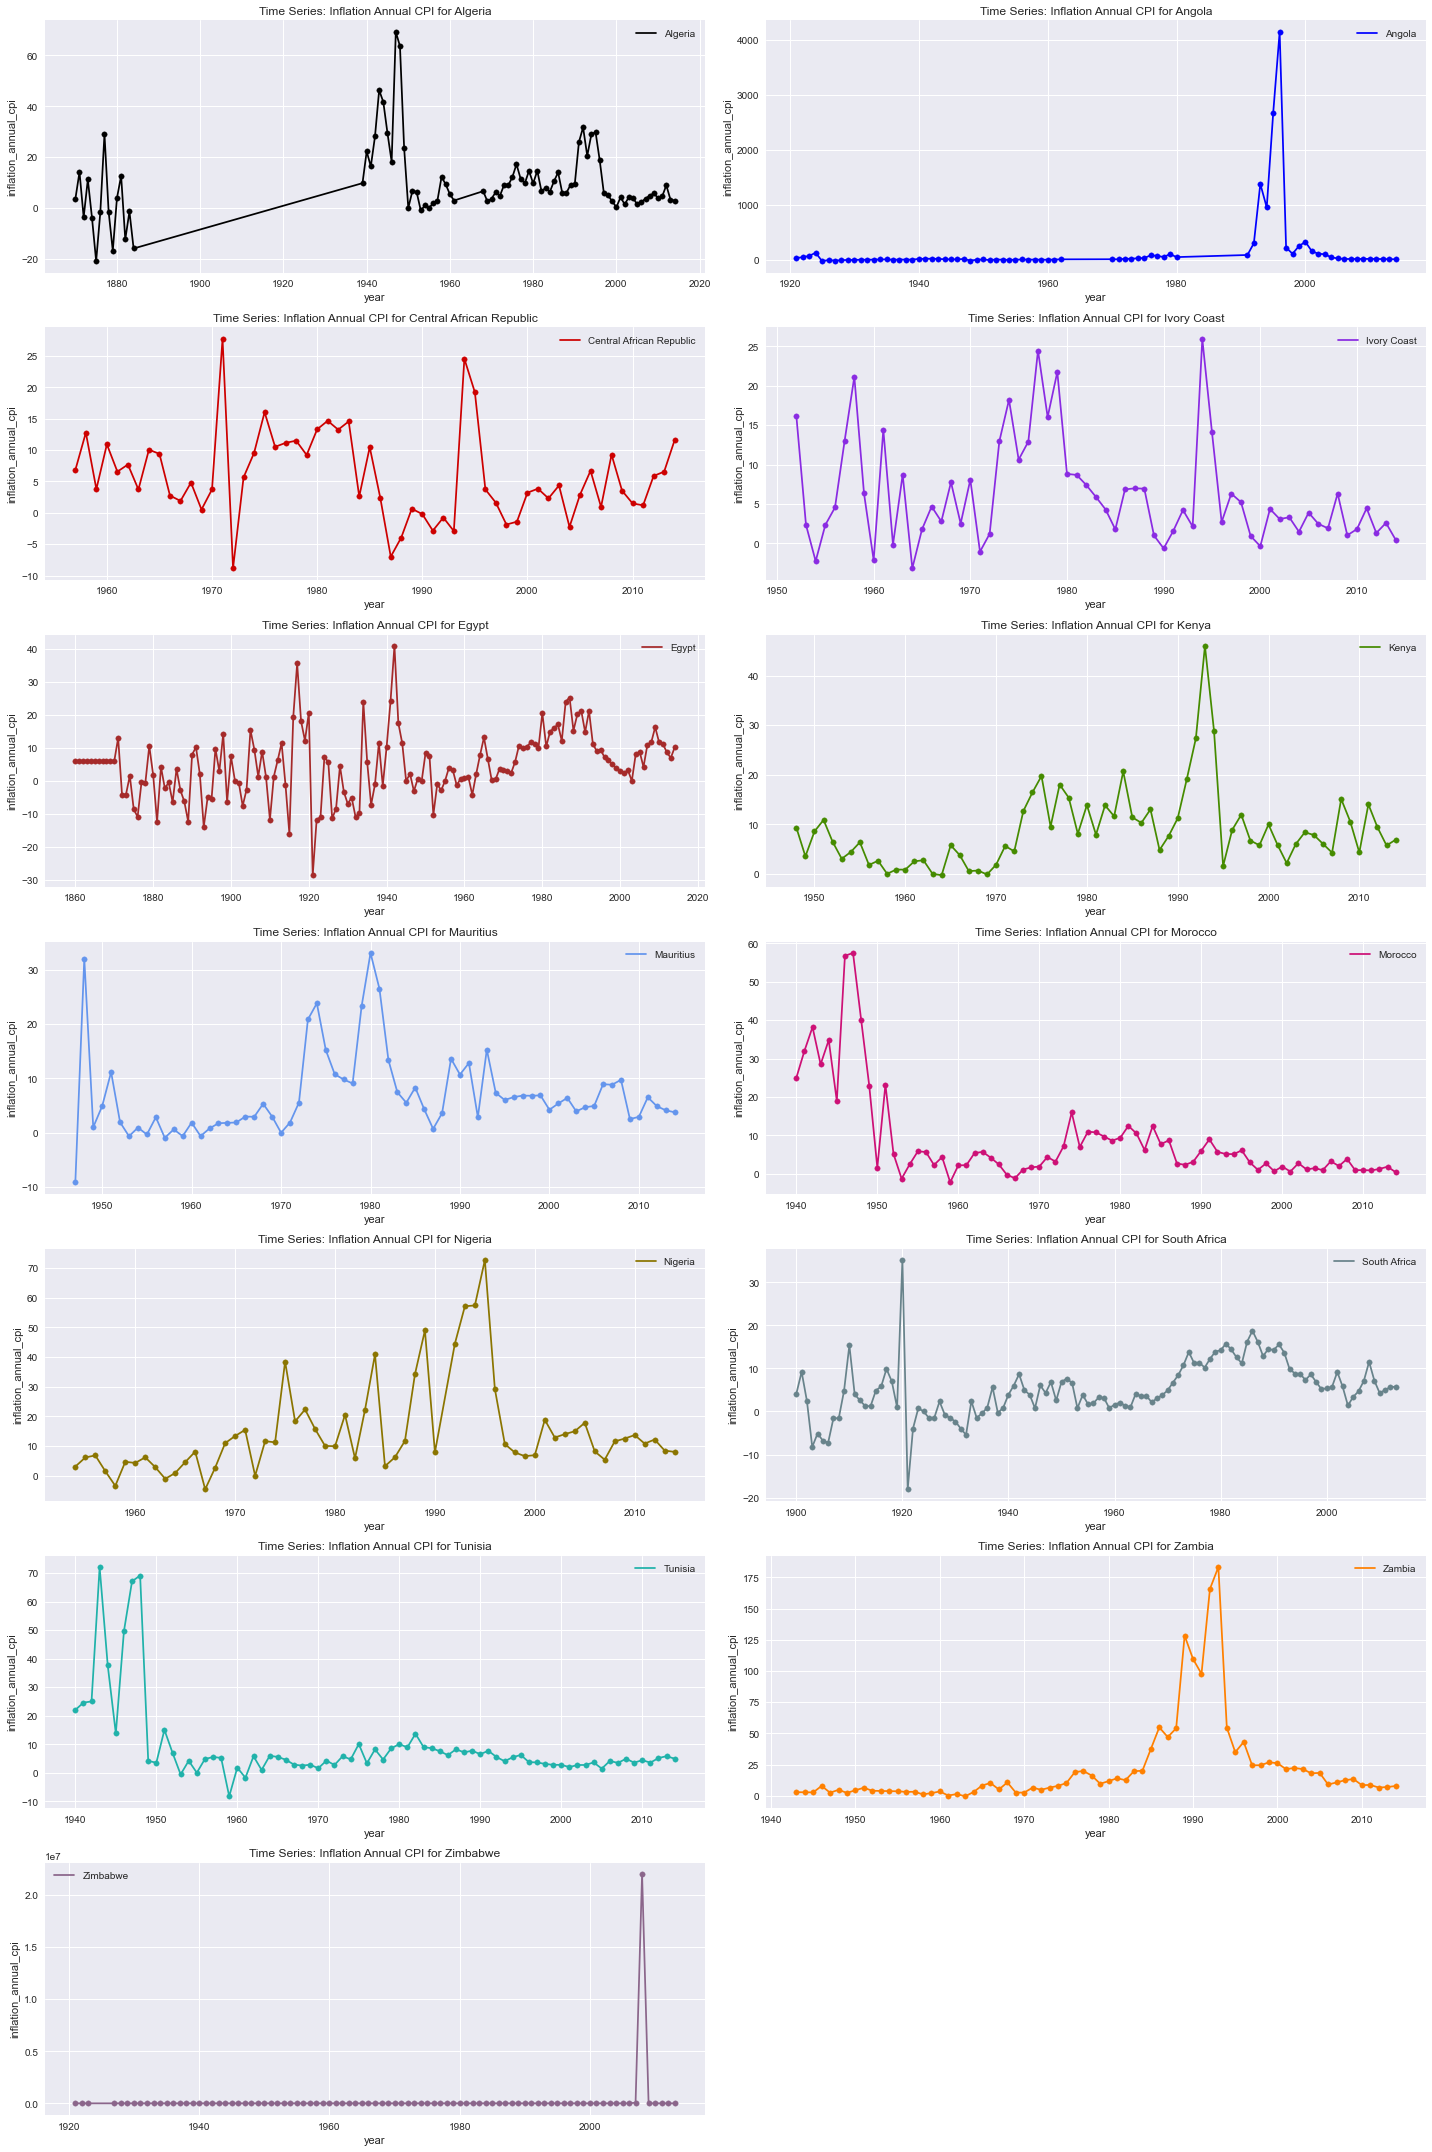

In [35]:
#Time series plot for annual inflation cpi
plt.style.use('seaborn')
plt.figure(figsize=(20,30))
count = 0
#color ="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
colors = ['#000000','#0000FF','#CD0000','#8A2BE2','#A52A2A',
               '#458B00','#6495ED','#CD1076','#8B7500','#68838B','#20B2AA',
               '#FF8000','#8B668B']

for c in country:
    plt.subplot(7,2,1+count) 
    col = colors[count]
    count +=1
    
    sns.lineplot(x=data[data.country == c]['year'], 
                 y=data[data.country == c]['inflation_annual_cpi'],
                    color = col, label=c)
    plt.scatter(x=data[data.country == c]['year'],
                y=data[data.country == c]['inflation_annual_cpi'],
                    color = col, s=30)  
    plt.title("Time Series: Inflation Annual CPI for "+ c) 
    plt.legend()
plt.tight_layout()

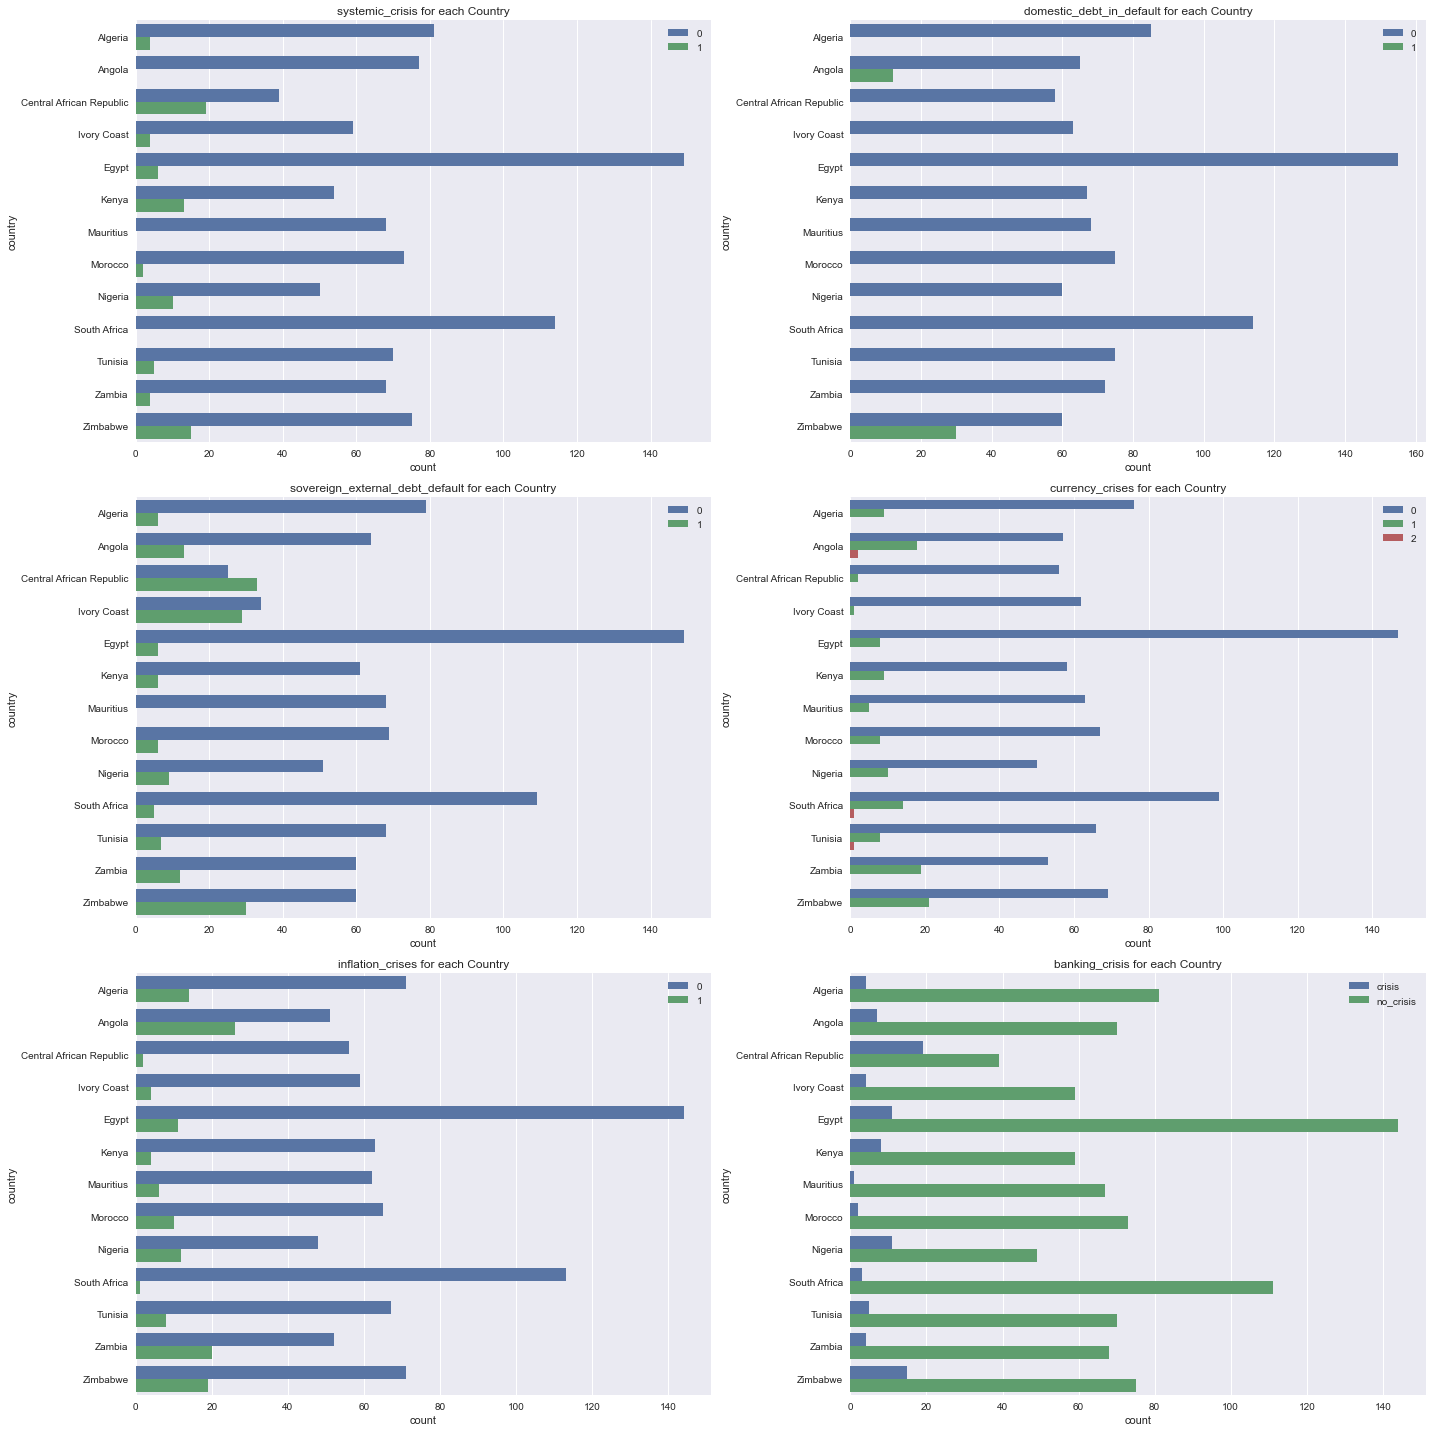

In [36]:
#Visualization of different crises for each country
chart=['systemic_crisis','domestic_debt_in_default',
      'sovereign_external_debt_default','currency_crises',
      'inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count = 0
for value in chart:
      plt.subplot(3,2, count+1)
      count +=1
      sns.countplot(y=data.country, hue=data[value])
      plt.legend(loc=0)
      plt.title(value +' for each Country')
      plt.tight_layout()

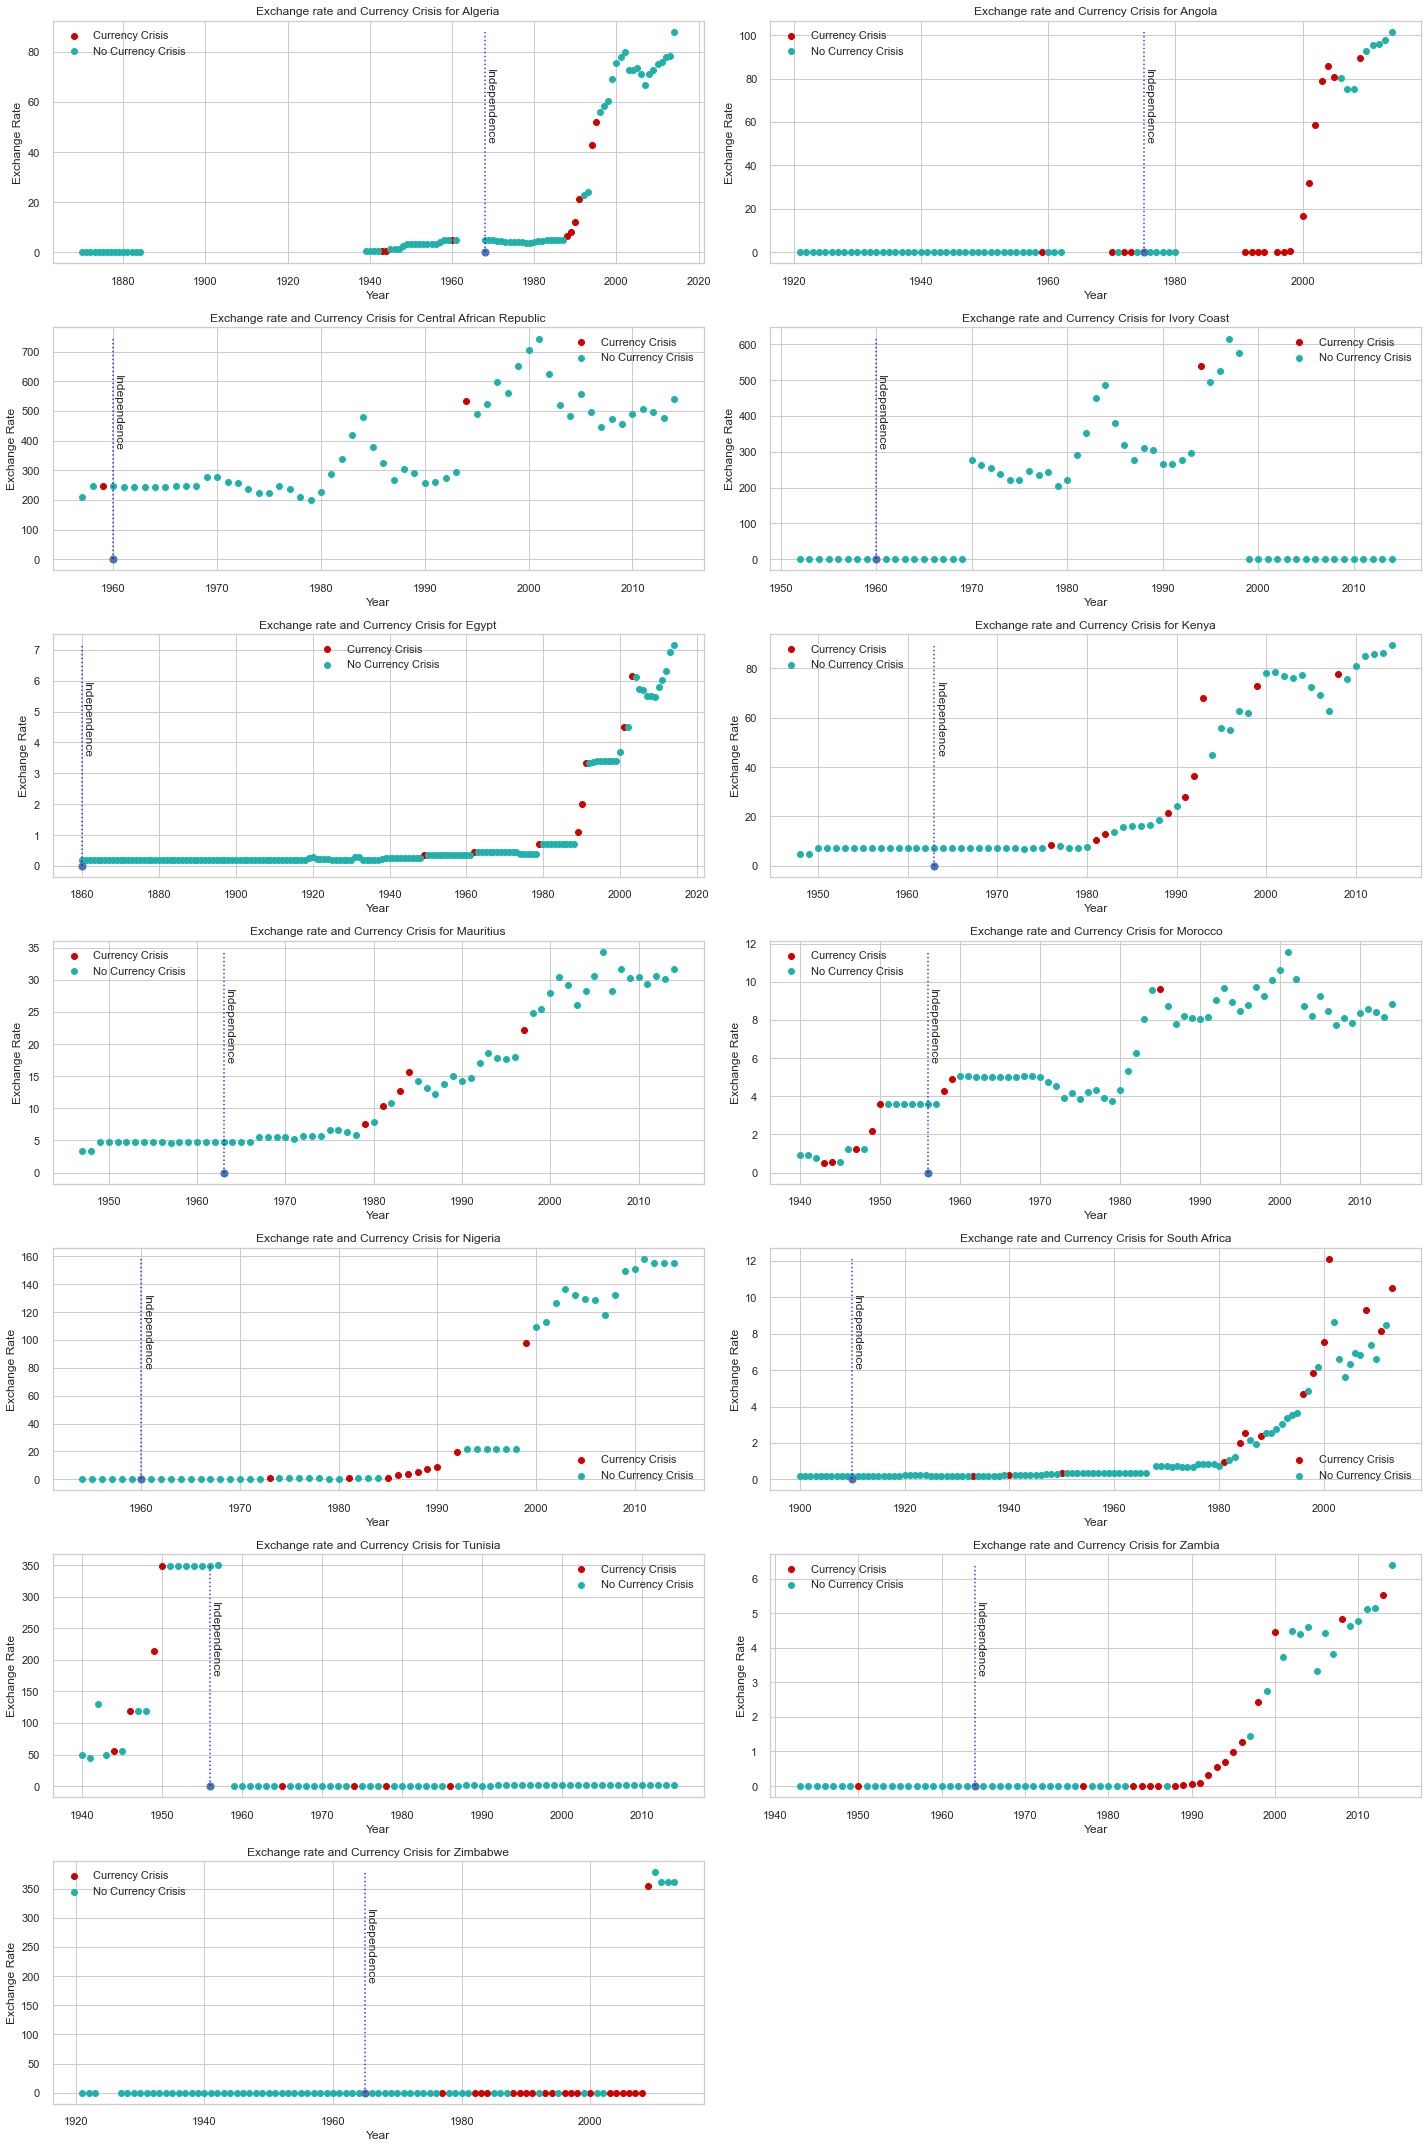

In [37]:
#Exchange rate and curreny crisis for each country showing independence year
sns.set(style='whitegrid')
plt.figure(figsize=(20,30))
count = 0
for c in country:
    plt.subplot(7, 2, count+1)
    count +=1
    plt.scatter(x=data.year[(data.country == c) & (data.currency_crises == 1)],
                y=data.exch_usd[(data.country == c) & (data.currency_crises == 1)], 
                c='#CD0000', label='Currency Crisis')
    plt.scatter(x=data.year[(data.country == c) & (data.currency_crises == 0)],
                y=data.exch_usd[(data.country == c) & (data.currency_crises == 0)], 
                c='#20B2AA', label='No Currency Crisis')
    plt.plot([np.min(data[np.logical_and(data.country==c,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==c,data.independence==1)]['year'])],
             [0, np.max(data[data.country==c]['exch_usd'])],
             color='blue',
             linestyle='dotted',
             alpha=0.8)
    
    plt.text(np.min(data[np.logical_and(data.country==c,data.independence==1)]['year']),
             np.max(data[data.country==c]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==c,data.independence==1)]['year']),
                y=0,
                s=50)
    plt.xticks()
    plt.xlabel('Year')
    plt.ylabel('Exchange Rate')
    plt.title('Exchange rate and Currency Crisis for '+ c)
    plt.legend()
plt.tight_layout()

In [38]:
data.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
data2 = data.copy()

In [6]:
data2.head(1)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis


In [7]:
data2.banking_crisis

0          crisis
1       no_crisis
2       no_crisis
3       no_crisis
4       no_crisis
          ...    
1054       crisis
1055    no_crisis
1056    no_crisis
1057    no_crisis
1058    no_crisis
Name: banking_crisis, Length: 1059, dtype: object

In [8]:
data2.banking_crisis[data2.banking_crisis == 'crisis'] = 1
data2.banking_crisis[data2.banking_crisis == 'no_crisis'] = 0

<ipython-input-8-4533c2b576c1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-4533c2b576c1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
data2.head(3)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0


In [ ]:
sns.jointplot(x=data2.inflation_annual_cpi, y=data2.banking_crisis, kind="reg")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='banking_crisis', ylabel='count'>

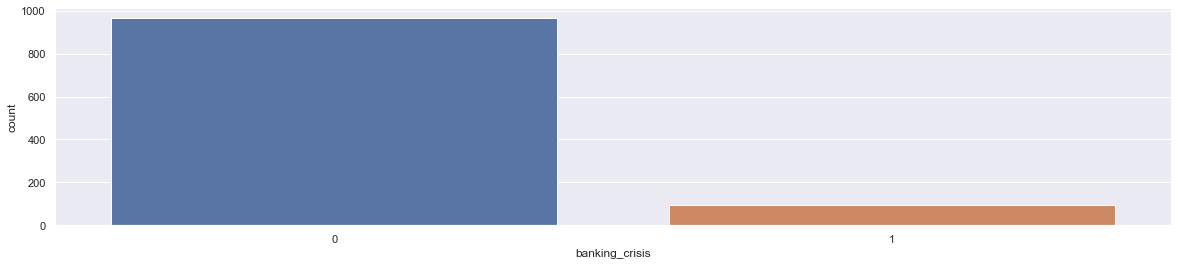

In [17]:
sns.set(rc={"figure.figsize": (20, 4)})
sns.countplot(data2.banking_crisis)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='banking_crisis', ylabel='Density'>

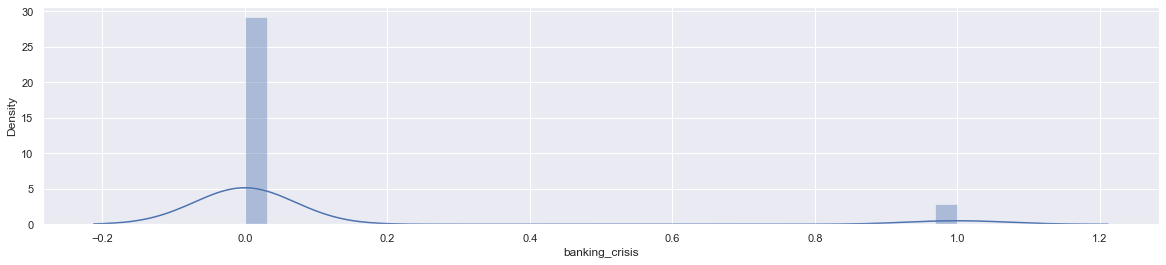

In [10]:
sns.set(rc={"figure.figsize": (20, 4)})
sns.distplot(data2.banking_crisis)

In [24]:
iplot([go.Scatter(x=data2['year'], y=data2['systemic_crisis'], mode='markers')])
iplot.tit

In [16]:
iplot([go.Histogram2dContour(x=data2['banking_crisis'], 
                             y=data2['systemic_crisis'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=data2['banking_crisis'], y=data2['systemic_crisis'], mode='markers')])

/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.


